# Exploratory Data Analysis on Amazon reviews dataset

### Data was collected from amazon marketplace across many countries, including multiple languages. Here we have only considered english for our EDA. The dataset is comes annotated based on the stars given by the customers whose customer_ids are masked. This dataset provides different columns including numerical as well as text so that we can put our data exploration techniques to good use. That is why after my little research I have chosen this dataset for completing this EDA assignment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

/Users/syamprakash/opt/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import warnings

In [3]:
warnings.simplefilter('always', category=UserWarning)

In [4]:
# !pip install datasets

In [4]:
from datasets import load_dataset
dataset = load_dataset("amazon_reviews_multi")

No config specified, defaulting to: amazon_reviews_multi/all_languages
Found cached dataset amazon_reviews_multi (/Users/syamprakash/.cache/huggingface/datasets/amazon_reviews_multi/all_languages/1.0.0/724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609)


  0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
dataset['train']

Dataset({
    features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
    num_rows: 1200000
})

In [6]:
df = dataset['train'].to_pandas()

In [7]:
df = df[df['language'] == 'en']

In [8]:
df.shape

(200000, 8)

In [9]:
df.head(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
200000,en_0964290,product_en_0740675,reviewer_en_0342986,1,Arrived broken. Manufacturer defect. Two of th...,I'll spend twice the amount of time boxing up ...,en,furniture
200001,en_0690095,product_en_0440378,reviewer_en_0133349,1,the cabinet dot were all detached from backing...,Not use able,en,home_improvement


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 200000 to 399999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   review_id         200000 non-null  object
 1   product_id        200000 non-null  object
 2   reviewer_id       200000 non-null  object
 3   stars             200000 non-null  int32 
 4   review_body       200000 non-null  object
 5   review_title      200000 non-null  object
 6   language          200000 non-null  object
 7   product_category  200000 non-null  object
dtypes: int32(1), object(7)
memory usage: 13.0+ MB


### Let's plot the data distribution to see if there are any skewness in the data

/Users/syamprakash/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


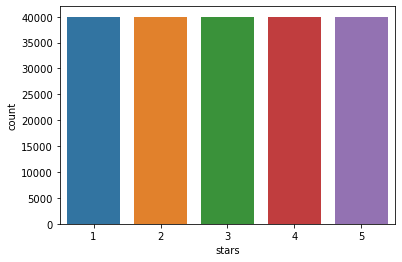

In [11]:
sns.countplot(df['stars'])
plt.show()

#### 
- Data is equally distributed within all 5 classes. Hence there is no data imbalance

/Users/syamprakash/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


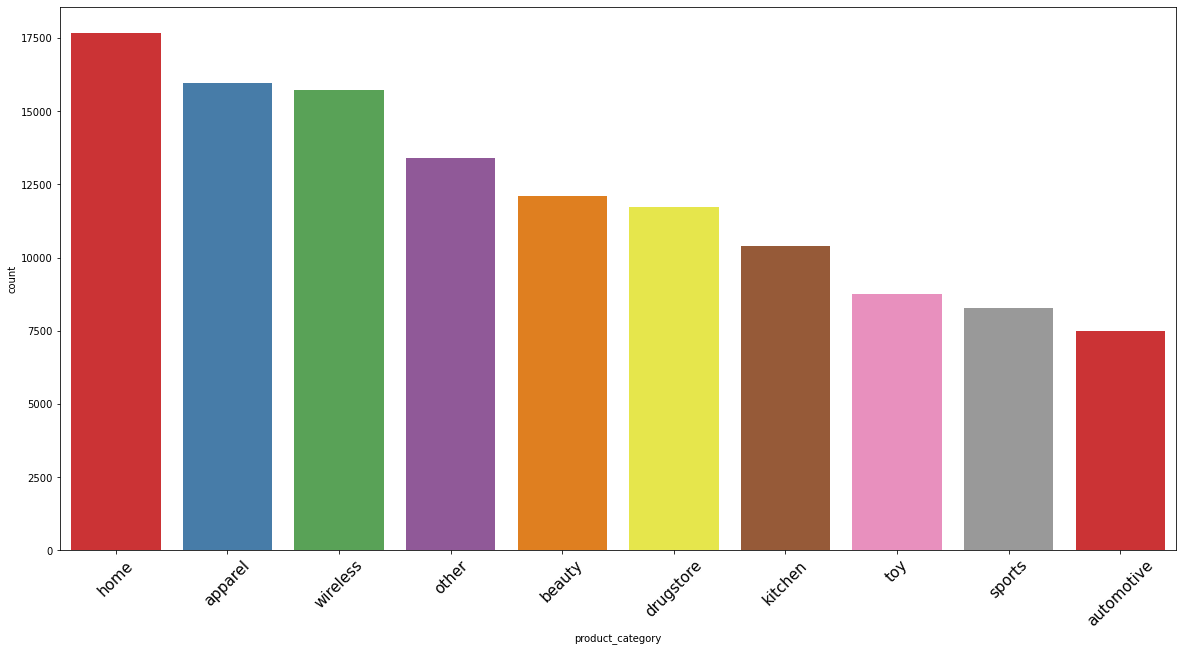

In [74]:
plt.figure(figsize=(20,10))
chart = sns.countplot(df['product_category'], order = df['product_category'].value_counts().iloc[:10].index,
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, fontsize = 15);

### Above figure displays how reviews are distibuted across each product category.
We can find that most of the reviews belong to product categories: 
 1. Home
 2. Wireless
 3. Apparel
 4. Sport
 5. Other

Meanwhile, product categories with the least number of reviews in the dataset include :

 1. Personal care appliances
 2. Musical instruments
 3. Video Games

*Since they represent a very low number of reviews, they are removed from the above plot for visualisation convenience*

In [19]:
#lets create a new column called word count. But before doing that we need to remove text cleaning so that we are only counting the important words. 
#Removing Stopwords.
import nltk
from nltk.corpus import stopwords
stop= stopwords.words('english')
df['reviews_without_stopwords'] = df['review_body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [20]:
df['wordcount'] = df['reviews_without_stopwords'].str.split(' ').str.len()
df.drop('reviews_without_stopwords', axis = 1, inplace = True)

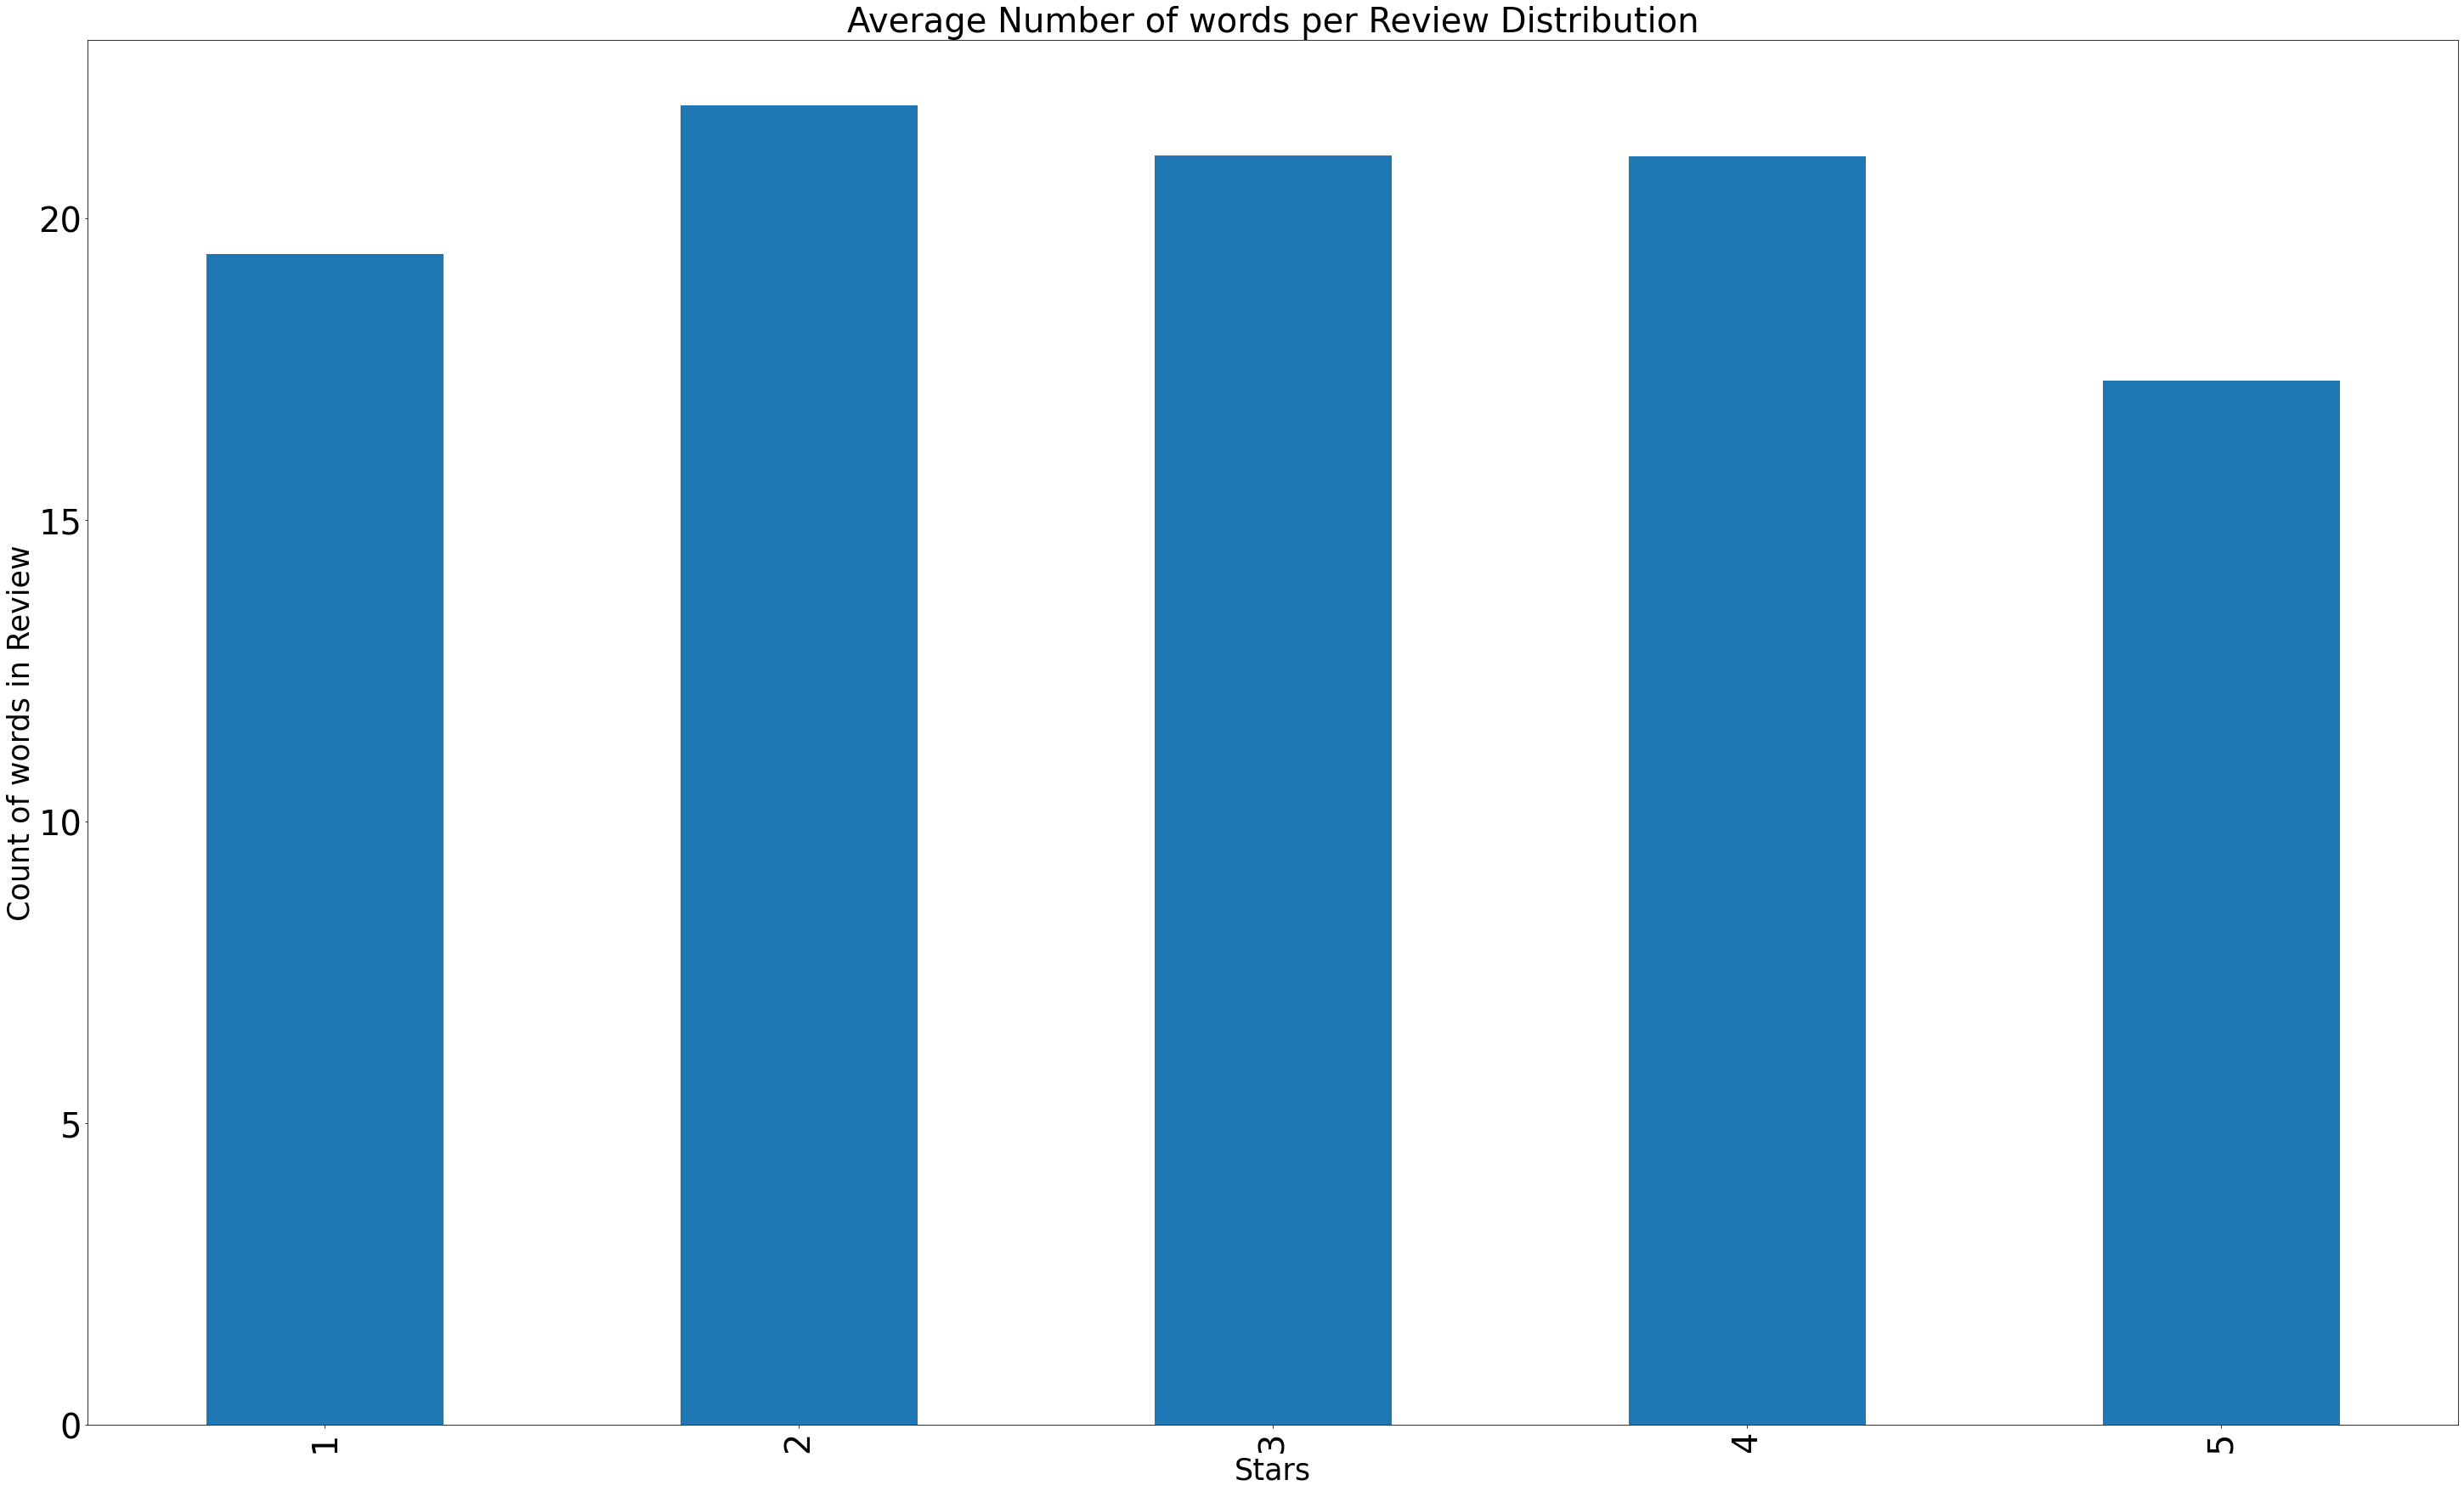

In [21]:
df.groupby('stars')['wordcount'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Stars', fontsize=35)
plt.ylabel('Count of words in Review', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of words per Review Distribution', fontsize=40)
plt.show()

In [22]:
review_star_corr = df[['stars','wordcount']].corr()

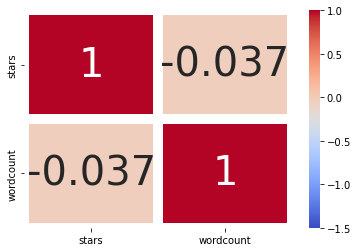

In [23]:
sns.heatmap(review_star_corr, cmap='coolwarm', annot=True, annot_kws={"size": 40}, linewidths=10, vmin=-1.5)
plt.show()

**From the above heatmap we can see that stars and word count have a negative correlation, which means that when the star rating goes down people write reviews in more detail. This might reflect the fact that Psychologically people tend to write more when they are complaining or frustrated**

In [24]:
#Grouping the data by Product category and Stars so that we can get to see which product catgory has the best star rating
grouped_df = df.groupby(['product_category','stars']).agg({'product_category':'count'})

In [25]:
grouped_df.head()

product_category
product_category stars                  
apparel          1                  2457
                 2                  3510
                 3                  3849
                 4                  3595
                 5                  2540

In [26]:
#Unstacking the grouped dataframe for Visualisation
grouped_df = grouped_df.unstack()

In [28]:
grouped_df.head()

product_category                        
stars                           1     2     3     4     5
product_category                                         
apparel                      2457  3510  3849  3595  2540
automotive                   1674  1398  1433  1509  1492
baby_product                  513   636   685   617   699
beauty                       2694  2520  2443  2140  2294
book                          535   585   792   723  1121

Removing product categories with least number of reviews for better visualisation

In [29]:
grouped_df['product_category'].loc[['personal_care_appliances','musical_instruments','video_games']]

stars,1,2,3,4,5
product_category,,,,,
personal_care_appliances,19,16,14,9,17
musical_instruments,214,204,200,244,240
video_games,213,147,141,144,130


In [30]:
grouped_df['product_category']=  grouped_df['product_category'].drop(['personal_care_appliances','musical_instruments','video_games','watch','digital_ebook_purchase','camera'], axis = 0)
grouped_df.dropna(inplace = True)

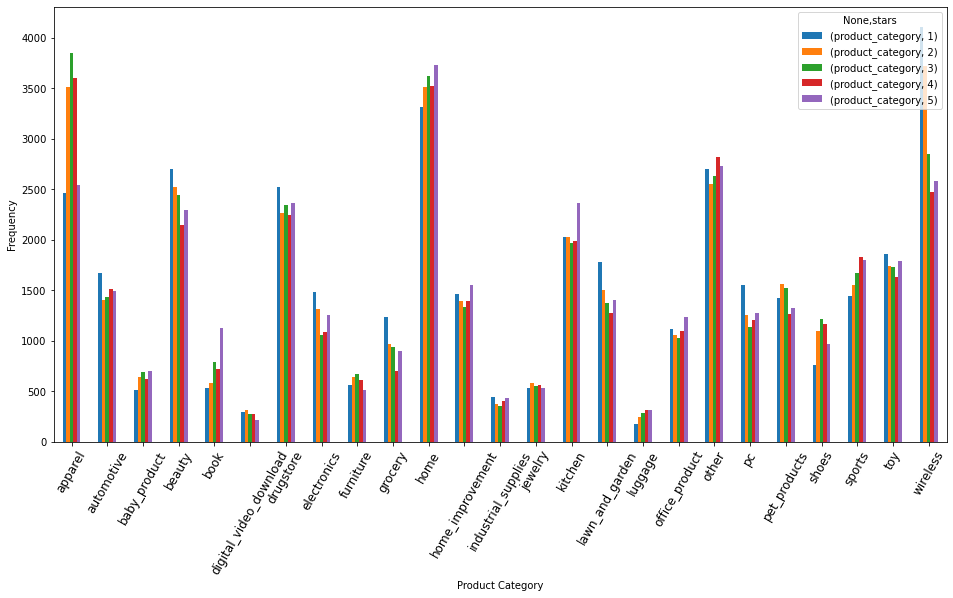

In [31]:
ax = grouped_df.plot(kind="bar")
fig = ax.get_figure()
sns.set_style()
palette='Set1'
# Change the plot dimensions (width, height)
fig.set_size_inches(16, 8)
# Change the axes labels
ax.set_xlabel("Product Category")
ax.set_ylabel("Frequency")
ax.set_xticklabels(ax.get_xticklabels(), rotation=60,fontsize =12);

### Now let's create a word cloud with the review titles. It gives us the most frequently used words in our dataset

**Most Frequent Words in the Review Titles for Good Reviews**

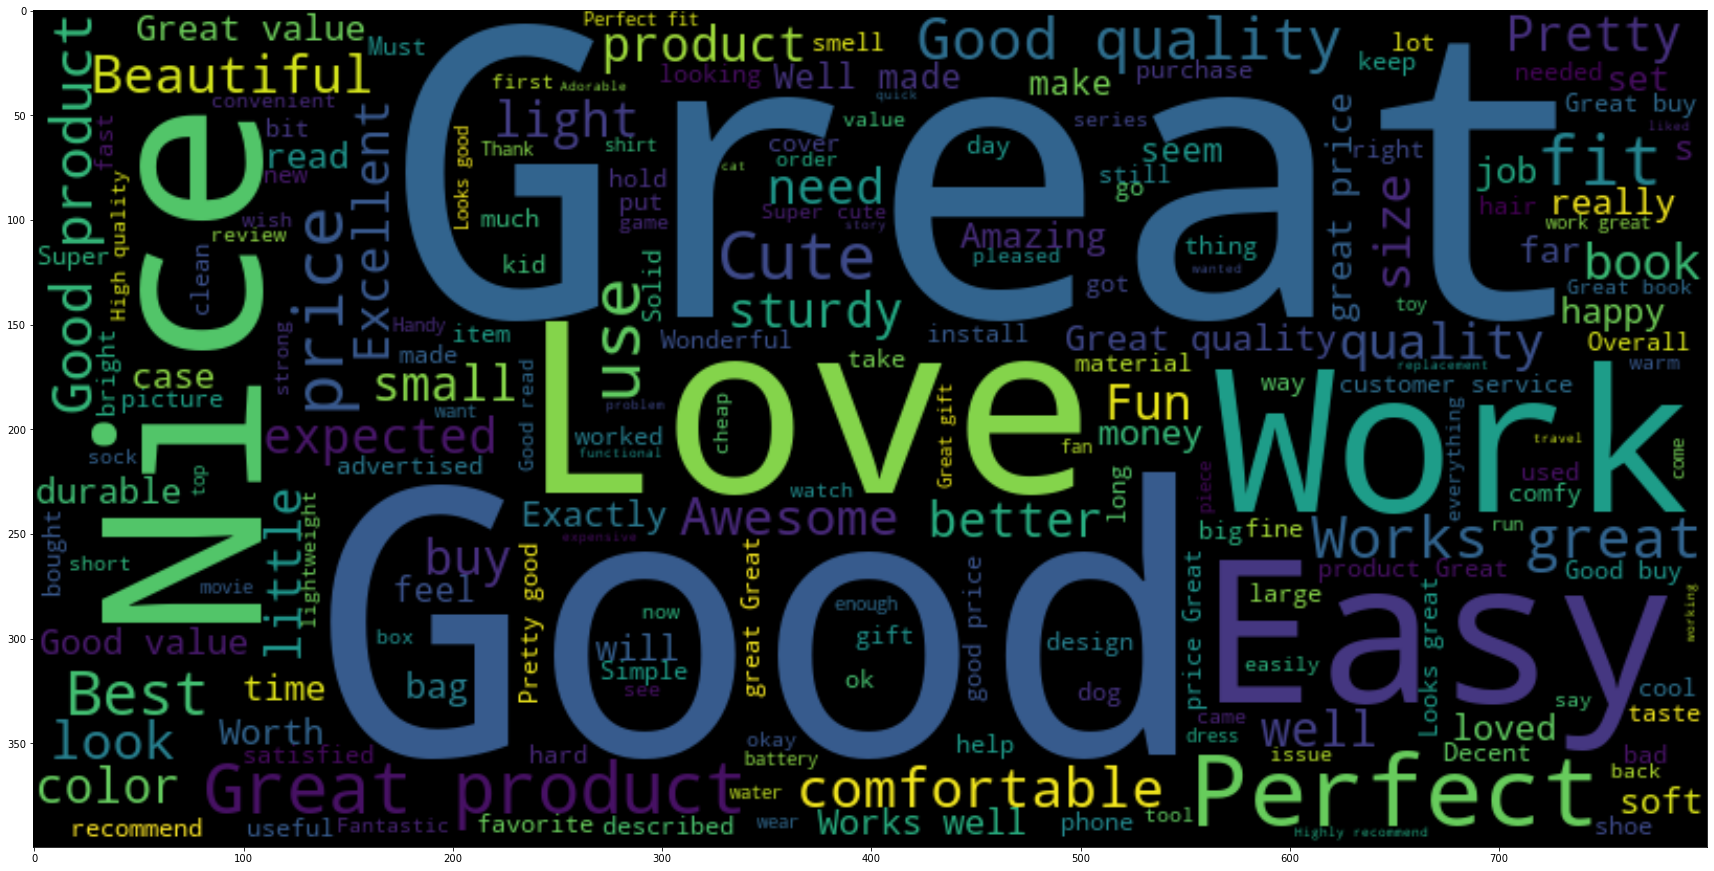

In [32]:
text = " ".join(review for review in df[df['stars']>3].review_title.astype(str))
stopwords = set(STOPWORDS)
stopwords.update(['stars','star','Four', 'Five','One','Two','Three'])
wordcloud = WordCloud(stopwords=stopwords, background_color="black", width=800, height=400).generate(text)
plt.figure( figsize=(30,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

**Most Frequent Words in the Review Titles for Bad Reviews**

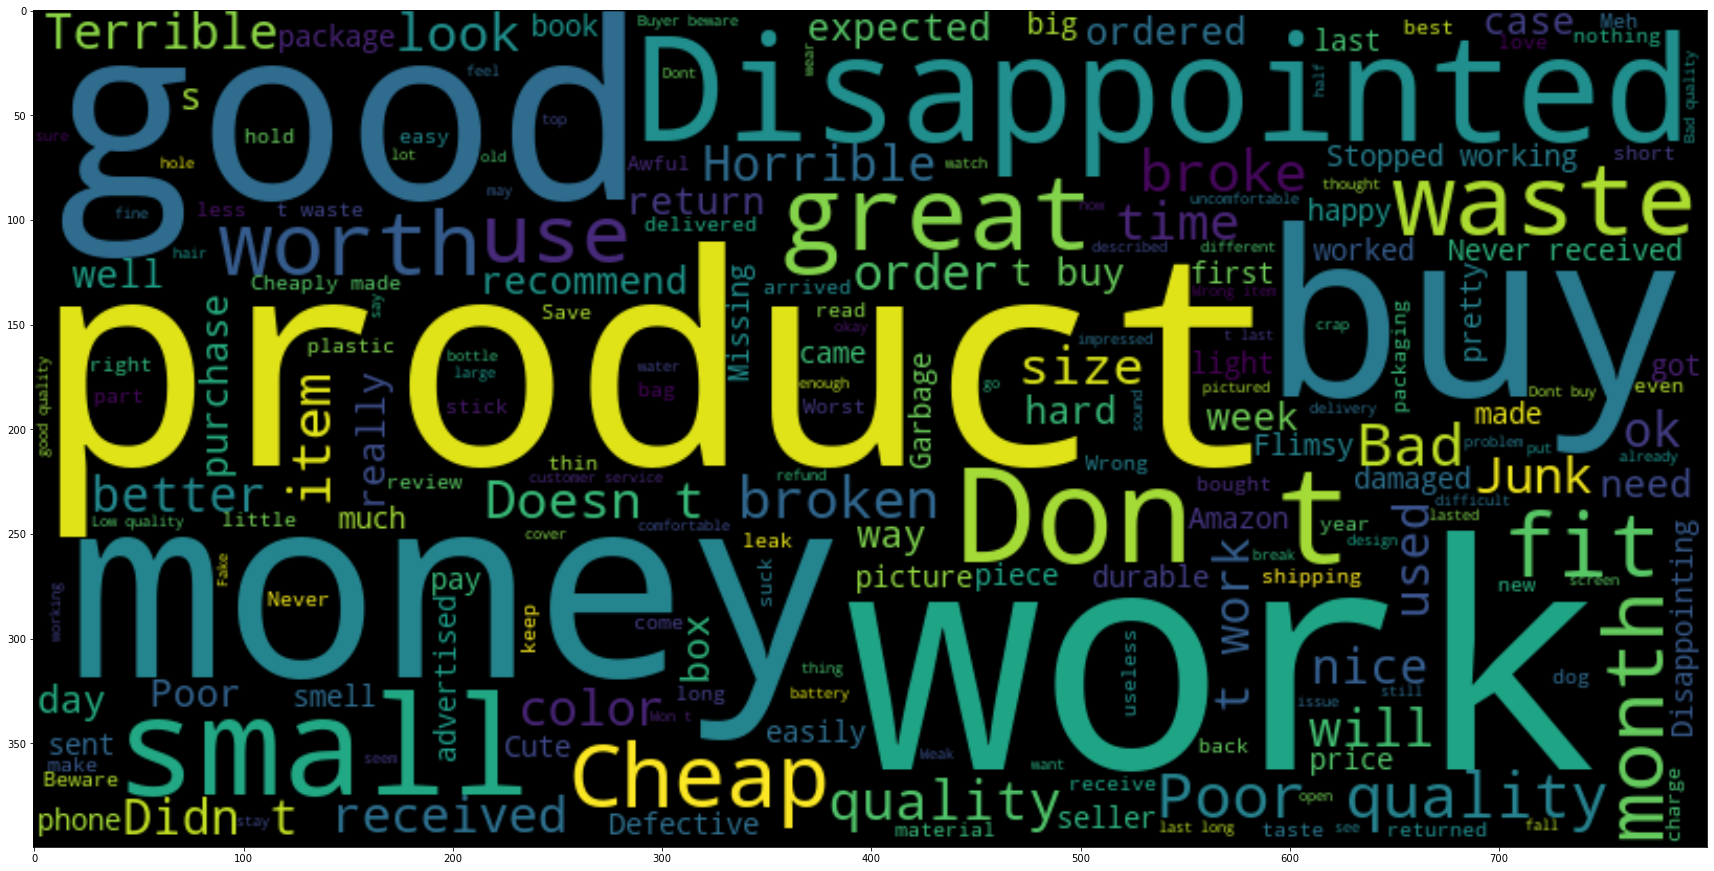

In [33]:
text = " ".join(review for review in df[df['stars']<3].review_title.astype(str))
wordcloud = WordCloud(stopwords=stopwords, background_color="black", width=800, height=400).generate(text)
plt.figure( figsize=(30,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

##### lets split the data into good and bad reviews with the star ratings we have

In [34]:
good_reviews = df[df['stars']>3]['review_body']
bad_reviews = df[df['stars']<3]['review_body']

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
def n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

good_bigrams = n_bigram(good_reviews)
bad_bigrams = n_bigram(bad_reviews)

In [38]:
good_bigram_df = pd.DataFrame(good_bigrams, columns = ['Good_Bigrams', 'Frequency'])
bad_bigram_df = pd.DataFrame(bad_bigrams, columns = ['Bad_Bigrams', 'Frequency'])

In [39]:
good_bigram_df.sort_values(by = 'Frequency', ascending = False, inplace = True)
bad_bigram_df.sort_values(by = 'Frequency', ascending = False, inplace = True)

/Users/syamprakash/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


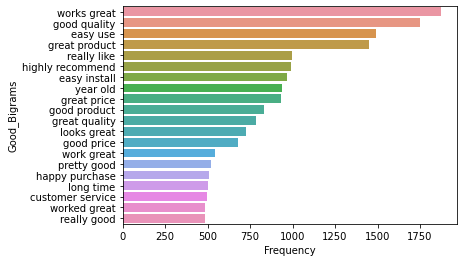

In [40]:
x=good_bigram_df['Good_Bigrams'][:20]
y=good_bigram_df['Frequency'][:20]
sns.barplot(y,x)
plt.show()

### Let's identify the product categories with the review "works great"

/Users/syamprakash/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


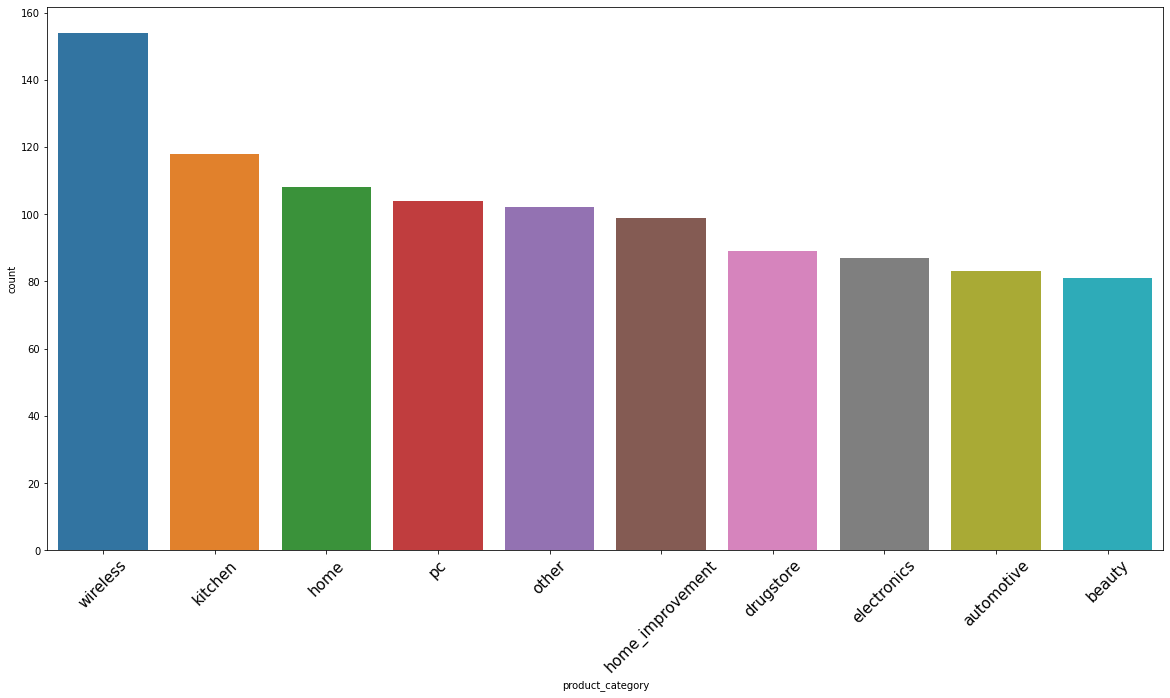

In [42]:
bigram_plot = "works great"
good_bigram = df[df['review_body'].str.contains(bigram_plot)]['product_category']
plt.figure(figsize=(20,10))
works_great = sns.countplot(good_bigram, order = good_bigram.value_counts().iloc[:10].index
)
works_great.set_xticklabels(works_great.get_xticklabels(), rotation=45, fontsize = 15);

/Users/syamprakash/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


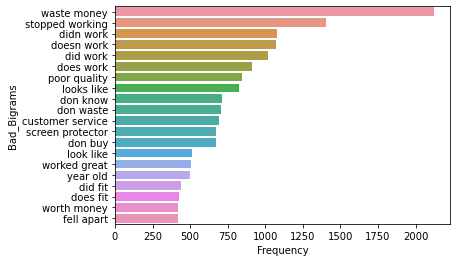

In [112]:
x=bad_bigram_df['Bad_Bigrams'][:20]
y=bad_bigram_df['Frequency'][:20]
sns.barplot(y,x)
plt.show()

### Let's identify the product categories with the review "waste money"

/Users/syamprakash/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


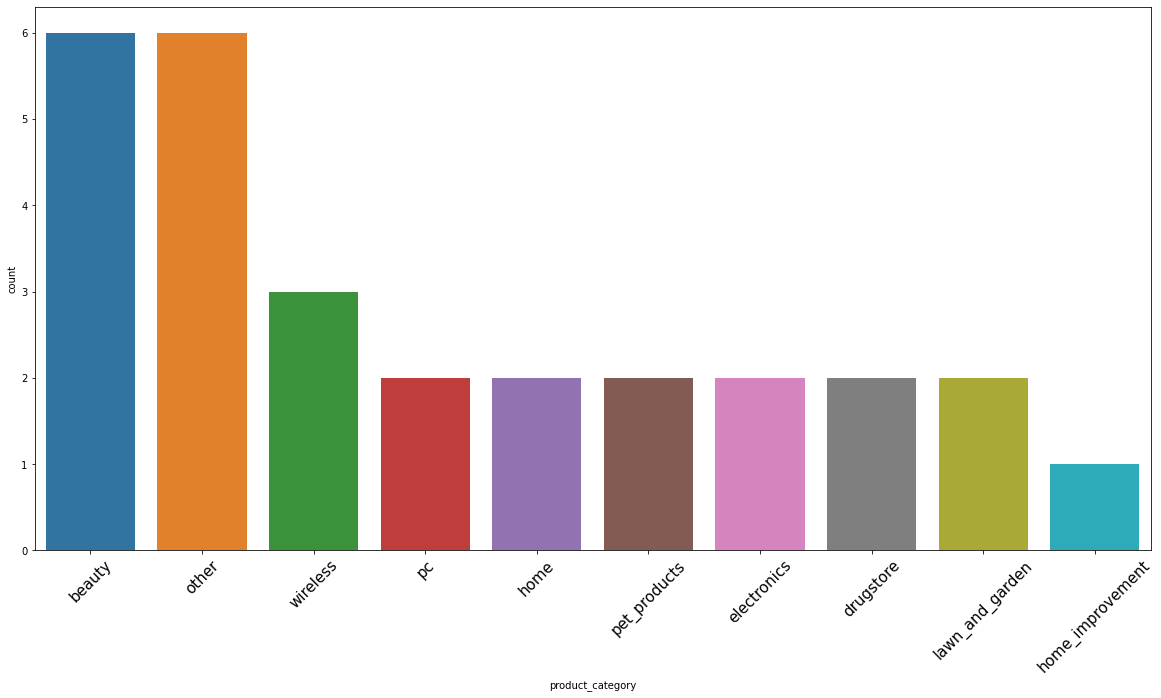

In [43]:
bigram_plot = "waste money"
bad_bigram = df[df['review_body'].str.contains(bigram_plot)]['product_category']
plt.figure(figsize=(20,10))
waste_money = sns.countplot(bad_bigram, order = bad_bigram.value_counts().iloc[:10].index
)
waste_money.set_xticklabels(waste_money.get_xticklabels(), rotation=45, fontsize = 15);